In [ ]:
!pip install pydub
!pip install noisereduce
import os
import librosa
import numpy as np
from tqdm import tqdm
import noisereduce as nr
from pydub import AudioSegment



# extracting mfccs from audio file


def wav2m(file_path, n_mfcc=13, max_len=39):

    wave, sr = librosa.load(file_path, mono=True, sr=None)

    noisy_part = wave[:]
    wave = nr.reduce_noise(y=wave, sr=sr)
    wave = np.asfortranarray(wave[::3])

    mfcc = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=n_mfcc, n_fft=2048, hop_length=512)

    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]


    delta_mfcc = librosa.feature.delta(mfcc, width=3)
    delta2_mfcc = librosa.feature.delta(mfcc, width=3, order=1)
    mfccs = np.concatenate((mfcc, delta_mfcc, delta2_mfcc))

    return mfccs


# extracting mfccs and storing them as numpy-array in destination folder

def save(path, dest, labels, max_len=39, coefficients=13):

    for label in labels:

        vectors = []

        wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + label)]

        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            mfcc = wav2m(wavfile)
            vectors.append(mfcc)

        np.save(dest + label + '.npy', vectors)
        np.save(dest + label + '.npy', vectors)
# loading mfccs from numpy-arrays

def load_data(path, labels, val_size, test_size):

    X = np.load(path + labels[0] + '.npy')
    y = np.full(X.shape[0], fill_value= labels[0])

    for i, label in enumerate(labels[1:]):
        x = np.load(path + label + '.npy')
        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value=i+1))
    return (X, y)

In [ ]:
import tensorflow as tf
import os
import keras
import librosa
import numpy as np
import noisereduce as nr
import IPython.display as ipd
import matplotlib.pyplot as plt
from keras.models import Sequential


from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam, Adadelta,RMSprop
from tensorflow.keras.layers import (Dense, Dropout, Flatten, Conv1D, Conv2D, GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, BatchNormalization, Activation, Bidirectional, TimeDistributed, SimpleRNN, GRU, LSTM, Input)
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
max_len = 39
coefficients = 13

labels=[]
for i in range (200):
    labels.append(str(i))


save(path='/content/drive/MyDrive/original/', dest='/content/drive/MyDrive/or2/', labels=labels)

Saving vectors of label - '199': 100%|██████████| 100/100 [00:13<00:00,  7.29it/s]


In [ ]:

def concat_wav(file1, file2, save_path):
    file1 = AudioSegment.from_wav(file1)
    file2 = AudioSegment.from_wav(file2)
    combined = file1 + file2
    combined.export(save_path, format='wav')



In [ ]:
file1 = "/content/drive/MyDrive/original/100/alif1_23_ngng_100.wav"

In [ ]:
path='/content/drive/MyDrive/original/'
for i in range(101,200):
  wavfiles = [path + str(i-100) + '/' + wavfile for wavfile in os.listdir(path + str(i-100))]
  itr=0
  for wavfile in tqdm(wavfiles, "Creating vectors of label - '{}'".format(i)):
    concat_wav(file1, wavfile, path + str(i) + '/' + str(itr))aw3
    itr=itr+1

In [ ]:
labels=[]
for i in range(1, 100):
    labels.append(str(i+100))



save(path='/content/drive/MyDrive/original/', dest='/content/drive/MyDrive/or2/', labels=labels)

Saving vectors of label - '199': 100%|██████████| 100/100 [00:09<00:00, 10.49it/s]


In [ ]:
labels=[]
for i in range(200):
  labels.append(str(i))

In [ ]:
# Loading train set and test set
X, y = load_data('/content/drive/MyDrive/or2/', labels=labels, val_size=0, test_size=0)


test_size = 0.2
val_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=45)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=45)


print('train shape: ', X_train.shape, ' ', y_train.shape)
print('validation shape: ', X_val.shape, ' ', y_val.shape)
print('test shape: ', X_test.shape, ' ', y_test.shape)

print('\n')
no_class = []
for i in range(200):
    no_class.append(0)
for i in y_train:
    no_class[int(i)] += 1
print(no_class)

print('\n')
no_class = []
for i in range(200):
    no_class.append(0)
for i in y_test:
    no_class[int(i)] += 1
print(no_class)

print('\n')
no_class = []
for i in range(200):
    no_class.append(0)
for i in y_val:
    no_class[int(i)] += 1
print(no_class)

train shape:  (14331, 39, 39)   (14331,)
validation shape:  (1593, 39, 39)   (1593,)
test shape:  (3982, 39, 39)   (3982,)


[59, 77, 62, 80, 73, 71, 70, 74, 77, 70, 61, 77, 76, 71, 72, 71, 67, 70, 74, 72, 72, 79, 77, 71, 62, 68, 69, 72, 75, 77, 74, 73, 84, 78, 66, 71, 72, 74, 71, 71, 66, 75, 71, 63, 71, 72, 74, 74, 74, 74, 71, 74, 65, 69, 71, 71, 76, 79, 74, 70, 84, 62, 78, 77, 69, 76, 71, 75, 70, 64, 70, 74, 73, 63, 72, 76, 73, 79, 72, 72, 72, 81, 67, 77, 73, 74, 61, 74, 77, 73, 64, 70, 72, 74, 67, 66, 68, 80, 71, 75, 14, 69, 71, 73, 65, 64, 74, 71, 68, 72, 80, 70, 70, 71, 68, 70, 69, 76, 70, 73, 75, 78, 68, 71, 81, 76, 70, 69, 73, 73, 75, 81, 73, 67, 64, 74, 68, 75, 73, 64, 74, 73, 80, 71, 67, 73, 73, 78, 74, 69, 78, 79, 60, 77, 72, 68, 76, 74, 64, 73, 73, 73, 78, 76, 71, 72, 68, 79, 66, 73, 83, 66, 74, 76, 78, 71, 72, 68, 68, 69, 71, 69, 74, 75, 69, 73, 73, 76, 73, 70, 66, 67, 70, 68, 75, 67, 75, 61, 77, 69]


[15, 17, 30, 17, 20, 20, 15, 20, 14, 19, 30, 19, 14, 23, 23, 23, 23, 23,

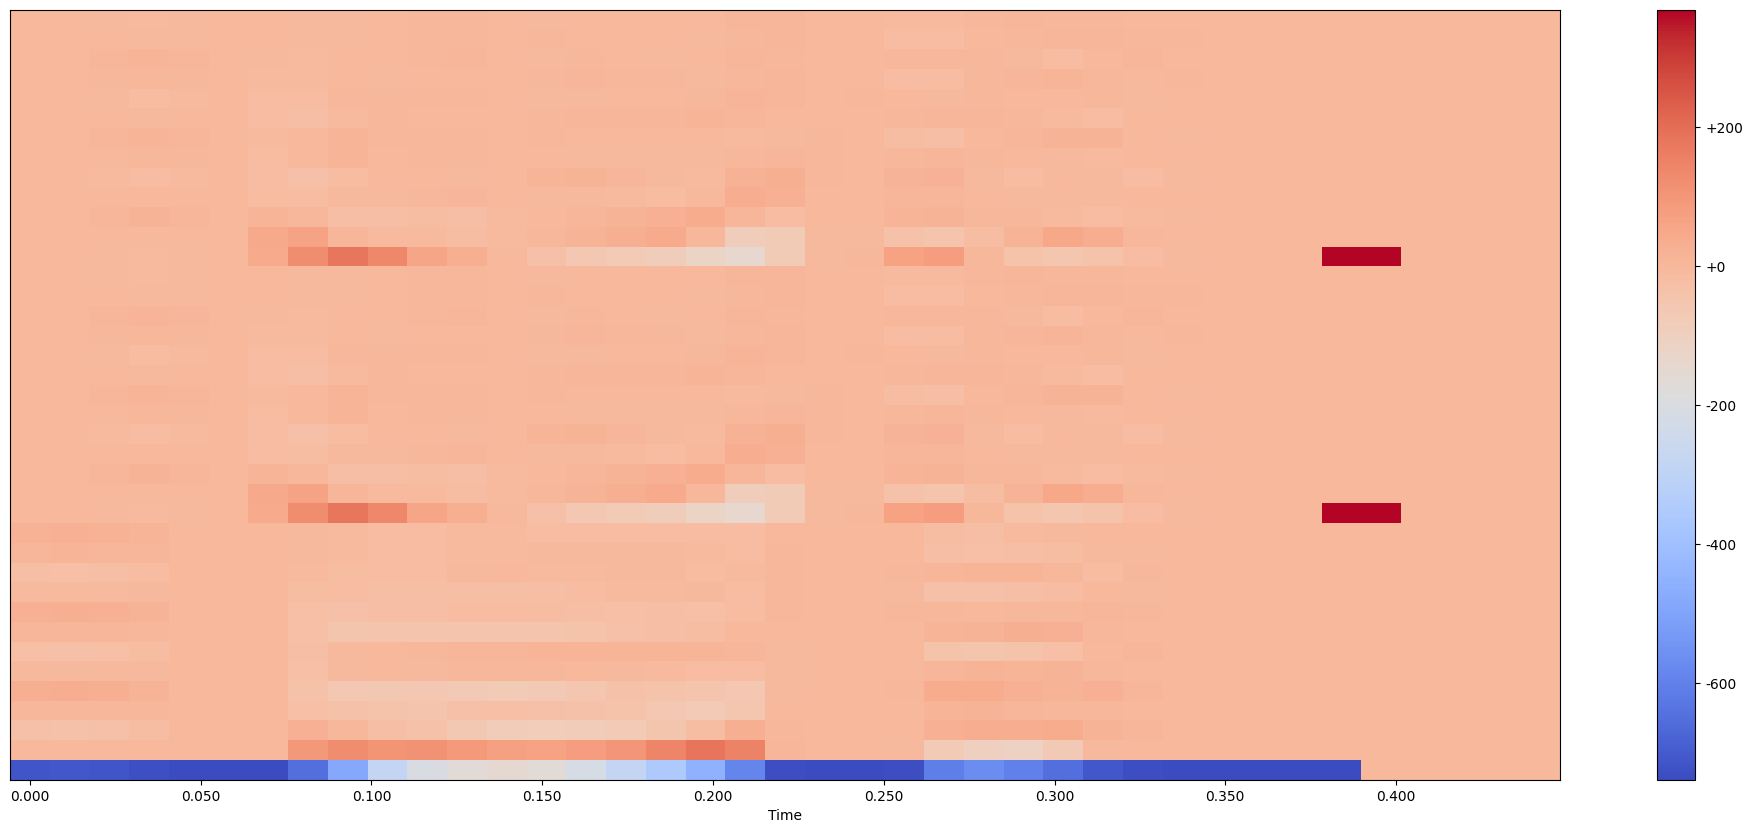

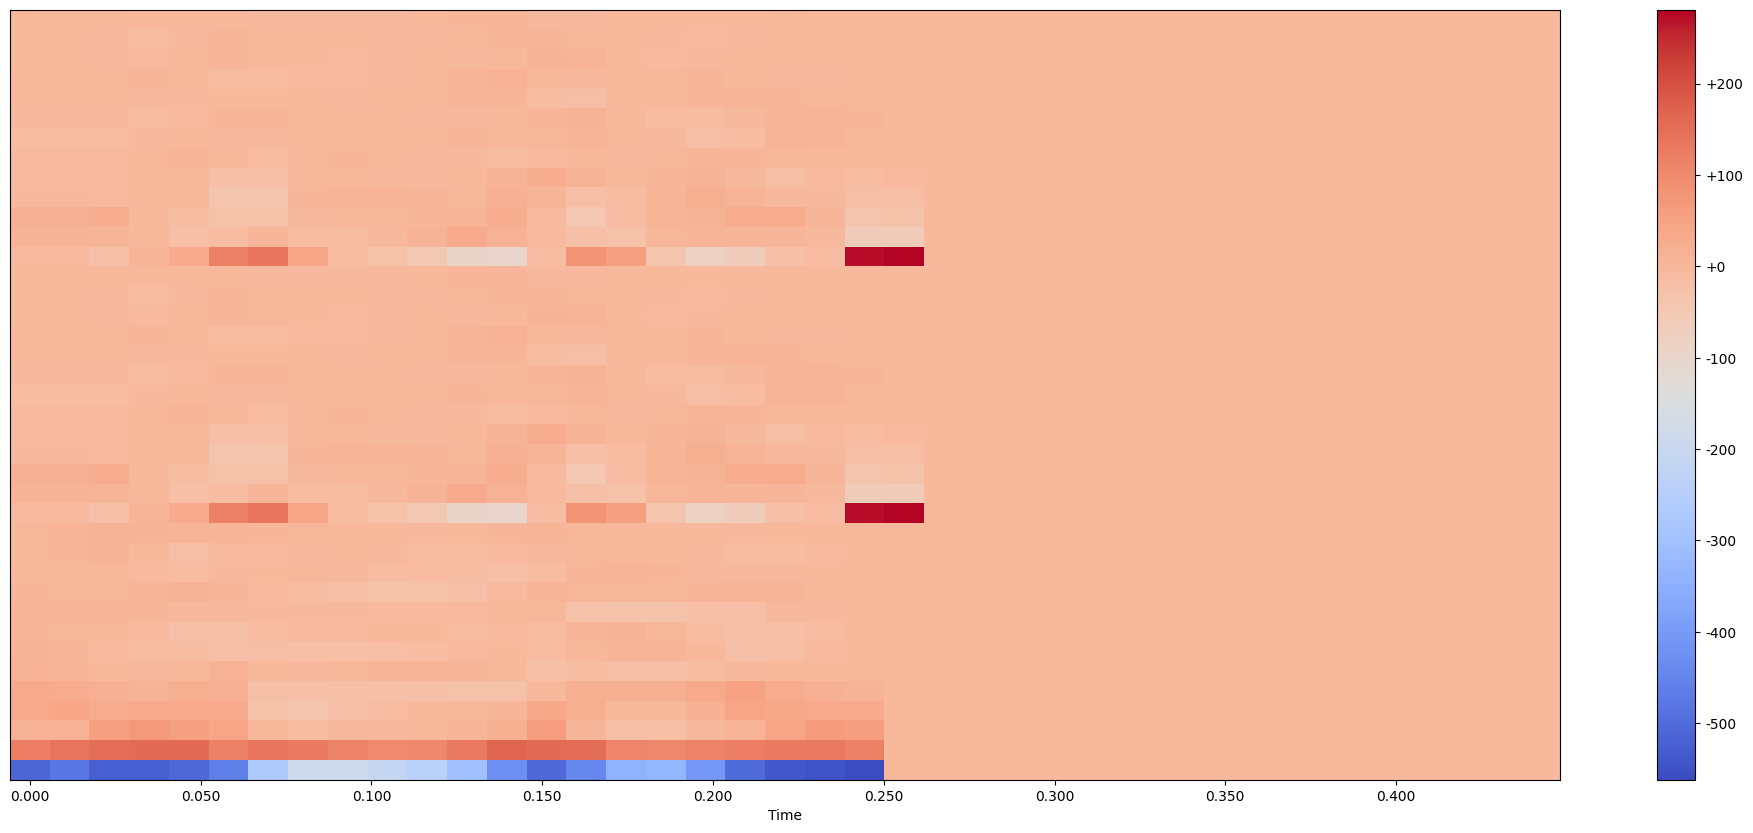

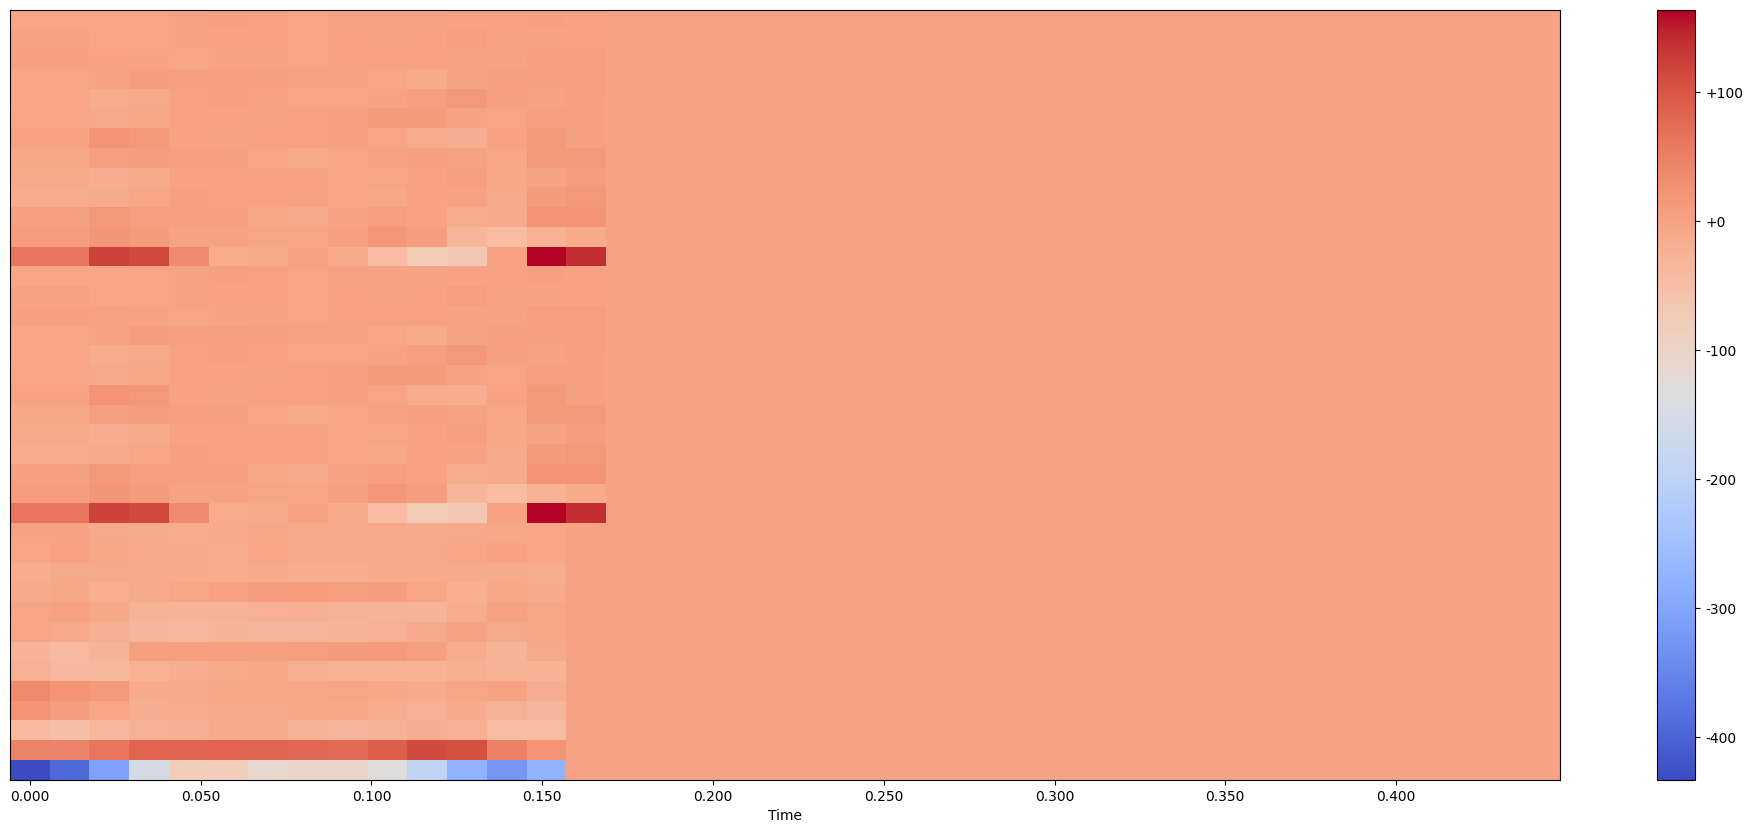

In [ ]:
from librosa import display

# showing how mfcc for number '1' looks like

for i in range(200):
    if int(y_train[i]) == 1:
        plt.figure(figsize=(25, 10))
        librosa.display.specshow(X_train[i],
                                 x_axis="time",
                                 sr=44000)
        plt.colorbar(format="%+2.f")
        plt.show()

In [ ]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_val = to_categorical(y_val)

# BSN-Conv

In [ ]:
# Feature dimension #

channels= 1
pool_size  = (2, 2)
kernel_size= (3, 3)

num_classes = 200


# reshaping mfcc to feed into our model #

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], channels)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], channels)
X_val   = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], channels)

input_shape = (X_train.shape[1], X_train.shape[2], channels)

keras.backend.clear_session()

# model architecture #

model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size, padding="same", input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=pool_size))

# 1st layer
model.add(Conv2D(48, kernel_size, padding="same", kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=pool_size))

# 2nd layer
model.add(Conv2D(64, kernel_size, padding="same", kernel_regularizer=keras.regularizers.l2(l=0.1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=pool_size))

# 3rd layer
model.add(Conv2D(128, kernel_size, padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))

# flatten and dense layer
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))

# output layer
model.add(Dense(num_classes, activation="softmax"))

# model compile
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=Adam(lr=.0001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 39, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 39, 39, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 39, 39, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 19, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 48)        13872     
                                                                 
 batch_normalization_1 (Bat  (None, 19, 19, 48)        1

# VGG-19

In [ ]:
# VGG19 model
def create_vgg19_model(input_shape):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(200, activation='softmax'))  # Adjust this based on the number of classes

    return model

# Create VGG19 model
input_shape = X_train.shape[1:]
model = create_vgg19_model(input_shape)

# Compile model with a specified learning rate (e.g., 0.001)
custom_lr = 0.001
optimizer = Adam(learning_rate=custom_lr)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

# Plot the training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Mobile-Net

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.applications.mobilenet import preprocess_input

# Load data in the format suitable for MobileNet
def load_data_mobilenet(path, labels, val_size, test_size, target_size=(224, 224)):
    X = np.load(path + labels[0] + '.npy')
    y = np.full(X.shape[0], fill_value=int(labels[0]))

    for i, label in enumerate(labels[1:]):
        x = np.load(path + label + '.npy')

        X = np.vstack((X, x))
        y = np.append(y, np.full(x.shape[0], fill_value=int(label)))

    # Resize and preprocess data for MobileNet
    X_resized = []
    for sample in X:
        img = array_to_img(sample, scale=False)
        img = img.resize(target_size)
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)  # Preprocess input according to MobileNet requirements
        X_resized.append(img_array)

    X_resized = np.array(X_resized)

    return (X_resized, y)

# Load data for MobileNet
X_mobilenet, y_mobilenet = load_data_mobilenet('/content/drive/MyDrive/or2/', labels=labels, val_size=0, test_size=0)



from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Define MobileNet model with custom output layer
def create_mobilenet_model(input_shape, num_classes):
    base_model = MobileNet(input_shape=input_shape, include_top=False, weights='imagenet')
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

# Create MobileNet model
input_shape_mobilenet = X_train_mobilenet.shape[1:]
num_classes = len(labels)
model_mobilenet = create_mobilenet_model(input_shape_mobilenet, num_classes)

# Compile model with an initial learning rate
initial_lr_mobilenet = 0.001
optimizer_mobilenet = Adam(learning_rate=initial_lr_mobilenet)
model_mobilenet.compile(optimizer=optimizer_mobilenet, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the MobileNet model
history_mobilenet = model_mobilenet.fit(
    X_train_mobilenet, y_train_mobilenet, epochs=10, batch_size=32, validation_data=(X_val_mobilenet, y_val_mobilenet))

# Evaluate the MobileNet model on the test set
test_loss_mobilenet, test_acc_mobilenet = model_mobilenet.evaluate(X_test_mobilenet, y_test_mobilenet)
print(f'Test Accuracy (MobileNet): {test_acc_mobilenet}')

# Plot the training history for MobileNet
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy (MobileNet)')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy (MobileNet)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluation

In [ ]:
model.fit(X_train, Y_train, epochs=20, batch_size=16, validation_data=(X_val, Y_val))

In [ ]:
model.evaluate(X_test, Y_test, verbose=1)

In [ ]:
model.save('%_on_200_class_CNN.h5')

In [ ]:
num_classes = 200
model.load_weights('%_on_200_class_CNN.h5')
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_test.argmax(axis=1), pred.argmax(axis=1), digits =4))